# Training the ML Model

In [2]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

In [3]:
canada_housing = pd.read_csv(r"C:\Users\gsharma\Downloads\Dataset\HouseListings-Top45Cities-10292023-kaggle.csv", encoding='latin1')

In [4]:
canada_housing.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [27]:
# Price feature will be target

#X = canada_housing.drop("Price", axis=1)

In [28]:
canada_housing.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [5]:
###  Converting type of columns to category 

canada_housing['City'] = canada_housing['City'].astype('category') 
canada_housing['Province'] = canada_housing['Province'].astype('category')

In [6]:
# Assigning numerical values and storing it in another columns 
canada_housing['City_new'] = canada_housing['City'].cat.codes 
canada_housing['Pro_new'] = canada_housing['Province'].cat.codes 

In [7]:
X = canada_housing [['City_new' , 'Number_Beds','Number_Baths','Pro_new','Population','Latitude','Longitude','Median_Family_Income']]
y = canada_housing ['Price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_test.head(2)

,City_new,Number_Beds,Number_Baths,Pro_new,Population,Latitude,Longitude,Median_Family_Income
26849,17,4,4,1,90990,49.2167,-122.6000,105000.0
1227,38,3,2,6,5647656,43.7417,-79.3733,97000.0


In [9]:
lm = LinearRegression()
lm.fit(X_train , y_train)

LinearRegression()

In [46]:
with open('model.pickle', 'wb') as file:
    pickle.dump(lm, file)

In [10]:
## Predict and evaluate

y_pred = lm.predict(X_test)

In [11]:
y_pred

array([1711036.17717892, 1277671.18543633, 1785682.8333556 , ...,
        254576.85120611, 1470838.86898173,  771976.41745538])

Coefficients: 
 [ 6.69362548e+03  1.69588428e+04  3.31802807e+05 -5.66232285e+04
  7.33114675e-02 -9.90185782e+04 -1.22810630e+04  3.60934451e+00]
Mean squared error: 726060776551.76
Coefficient of determination: 0.30


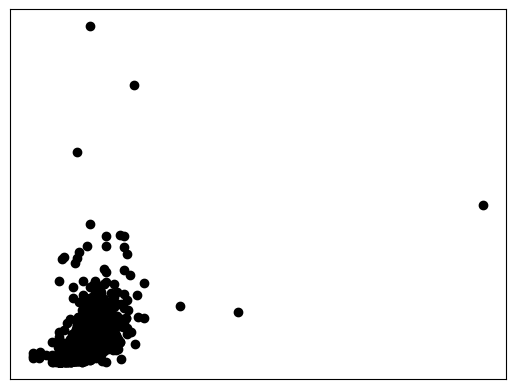

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# The coefficients
print("Coefficients: \n", lm.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_pred, y_test, color="black")

plt.xticks(())
plt.yticks(())

plt.show()